<a href="https://colab.research.google.com/github/kimtaehyuk1/Cloud_AI_local/blob/master/%EA%B9%80%ED%83%9C%ED%98%81_%ED%8C%8C%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 학원 데이터 정제 및 추출

In [89]:
import numpy as np
import pandas as pd

In [90]:
seoul_aca_df = pd.read_csv('/content/drive/MyDrive/Cloud_AI/프로젝트 1 데이터/서울시 학원 교습소정보.csv',encoding='CP949' )
seoul_aca_df.head()

,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,...,인당수강료내용,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,휴원시작일자,휴원종료일자,개설일자,적재일시
0,동대문구,학원,1000000043,도우리이용기술학원,서울특별시 동대문구 왕산로33길 32,/ 2층 (제기동),직업기술,산업응용기술,이?미용/,이?미용,...,NaN,Y,N,130862,개원,19670209,NaN,NaN,19670209,20230108
1,동대문구,학원,1000000064,대성회계실무학원,서울특별시 동대문구 왕산로 225,/ 5층2호?5층6호?5층7호 중 일부(B호) (청량리동/ 미주상가),종합(대),NaN,전산회계/컴퓨터(정보처리/통신기기/인터넷/소프트웨어)/,NaN,...,NaN,Y,N,2490,개원,19681227,NaN,NaN,19681227,20230108
2,동대문구,학원,1000000083,국제전자과학학원,서울특별시 동대문구 고산자로36길 3,/ 3층 일부 (제기동/ 경동시장),직업기술,산업기반기술,전자/,전자,...,NaN,Y,N,2571,개원,19680210,NaN,NaN,19680210,20230108
3,동대문구,학원,1000000147,조이앤플레이음악학원,서울특별시 동대문구 이문로 38,/ 3층 301호 (휘경동/ 민족통일빌딩),예능(대),예능(중),음악/,음악,...,NaN,Y,N,2445,개원,19720630,NaN,NaN,19720630,20230108
4,동대문구,학원,1000000151,한독자동차정비학원,서울특별시 동대문구 왕산로 31,/ 2층/3층 (신설동),직업기술,산업기반기술,NaN,자동차,...,NaN,Y,N,130811,개원,19720501,NaN,NaN,19720501,20230108


In [91]:
seoul_aca_df['행정구역명'].unique()

array(['동대문구', '중랑구', '마포구', '서대문구', '은평구', '영등포구', '구로구', '금천구', '노원구',
       '도봉구', '종로구', '중구', '용산구', '강동구', '송파구', '강서구', '양천구', '서초구',
       '강남구', '동작구', '관악구', '성동구', '광진구', '성북구', '강북구', nan], dtype=object)

In [92]:
seoul_aca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25903 entries, 0 to 25902
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   행정구역명       25825 non-null  object 
 1   학원/교습소      25903 non-null  object 
 2   학원지정번호      25903 non-null  int64  
 3   학원명         25903 non-null  object 
 4   도로명주소       25893 non-null  object 
 5   도로명상세주소     25817 non-null  object 
 6   분야명         25903 non-null  object 
 7   교습계열명       25411 non-null  object 
 8   교습과정목록명     18158 non-null  object 
 9   교습과정명       25413 non-null  object 
 10  정원합계        25903 non-null  int64  
 11  일시수용능력인원합계  25891 non-null  float64
 12  인당수강료내용     4933 non-null   object 
 13  수강료공개여부     24639 non-null  object 
 14  기숙사학원여부     24258 non-null  object 
 15  도로명우편번호     25903 non-null  int64  
 16  등록상태명       25903 non-null  object 
 17  등록일자        25903 non-null  int64  
 18  휴원시작일자      359 non-null    float64
 19  휴원종료일자      359 non-null 

In [93]:
seoul_aca_df.shape

(25903, 22)

In [94]:
seoul_aca_df['학원/교습소']

0         학원
1         학원
2         학원
3         학원
4         학원
        ... 
25898     학원
25899     학원
25900    교습소
25901    교습소
25902    교습소
Name: 학원/교습소, Length: 25903, dtype: object

In [95]:
seoul_aca_pivot = pd.pivot_table(seoul_aca_df, index=['행정구역명'],values=['학원/교습소'],aggfunc='count')
seoul_aca_pivot = seoul_aca_pivot.sort_values(by=['학원/교습소'], ascending=False)
seoul_aca_pivot

,학원/교습소
행정구역명,
강남구,3627
양천구,2164
송파구,2011
서초구,1895
노원구,1457
강서구,1356
강동구,1305
마포구,1128
은평구,1097


In [96]:
seoul_aca_pivot.rename(columns={'학원/교습소':'학원개수'}, inplace=True)
seoul_aca_pivot

,학원개수
행정구역명,
강남구,3627
양천구,2164
송파구,2011
서초구,1895
노원구,1457
강서구,1356
강동구,1305
마포구,1128
은평구,1097


# 학교 데이터 추출 및 정제

In [97]:
seoul_sch_df = pd.read_csv('/content/drive/MyDrive/Cloud_AI/프로젝트 1 데이터/서울시 학교 기본정보.csv',encoding='CP949' )
seoul_sch_df.head()

,학교종류명,설립구분,표준학교코드,학교명,영문학교명,관할조직명,도로명우편번호,도로명주소,도로명상세주소,전화번호,...,주야구분명,설립일자,개교기념일,시도교육청코드,시도교육청명,소재지명,주야과정,계열명,학과명,적재일시
0,각종학교(중),사립,7134155,선화예술중학교,Sunhwa Arts Middle School,서울특별시성동광진교육지원청,4991,서울특별시 광진구 천호대로 664,/ 선화예술중고등학교 (능동),02-2204-1100,...,주간,19731201,19730705,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20221225
1,초등학교,공립,7134150,서울숭신초등학교,Seoul Soongshin Elementary School,서울특별시성동광진교육지원청,4702,서울특별시 성동구 마장로 161,(하왕십리동),02-2252-5950,...,주간,19590403,19590403,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20221225
2,중학교,공립,7134142,행당중학교,Haengdang Middle School,서울특별시성동광진교육지원청,4764,서울특별시 성동구 왕십리로 189,(행당동/행당중학교),02-2292-2721,...,주간,19680806,19681002,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20221225
3,중학교,사립,7134141,한양대학교사범대학부속중학교,Hanyang University Middle School,서울특별시성동광진교육지원청,4761,서울특별시 성동구 마조로 42,(사근동/한양사대부속중?고등학교),02-2200-3700,...,주간,19600118,19600118,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20221225
4,중학교,공립,7134140,자양중학교,Jayang Middle School,서울특별시성동광진교육지원청,5069,서울특별시 광진구 뚝섬로41길 33,(자양동/서울자양중학교),02-446-0365,...,주간,19840301,19840301,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20221225


In [98]:
seoul_sch_df['자치구'] = seoul_sch_df['도로명주소'].apply( lambda x: x.split()[1])
seoul_sch_df.head(2)

,학교종류명,설립구분,표준학교코드,학교명,영문학교명,관할조직명,도로명우편번호,도로명주소,도로명상세주소,전화번호,...,설립일자,개교기념일,시도교육청코드,시도교육청명,소재지명,주야과정,계열명,학과명,적재일시,자치구
0,각종학교(중),사립,7134155,선화예술중학교,Sunhwa Arts Middle School,서울특별시성동광진교육지원청,4991,서울특별시 광진구 천호대로 664,/ 선화예술중고등학교 (능동),02-2204-1100,...,19731201,19730705,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20221225,광진구
1,초등학교,공립,7134150,서울숭신초등학교,Seoul Soongshin Elementary School,서울특별시성동광진교육지원청,4702,서울특별시 성동구 마장로 161,(하왕십리동),02-2252-5950,...,19590403,19590403,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20221225,성동구


In [99]:
len(seoul_sch_df['자치구'].unique())

25

In [100]:
seoul_sch_pivot = pd.pivot_table(seoul_sch_df, index=['자치구'],values=['학교명'],aggfunc='count')
seoul_sch_pivot = seoul_sch_pivot.sort_values(by=['학교명'], ascending=False)
seoul_sch_pivot

,학교명
자치구,
노원구,312
강서구,262
관악구,246
은평구,237
종로구,215
강남구,208
중구,183
성북구,171
송파구,171


In [101]:
seoul_sch_pivot.rename(columns={'학교명':'학교개수'}, inplace=True)
seoul_sch_pivot

,학교개수
자치구,
노원구,312
강서구,262
관악구,246
은평구,237
종로구,215
강남구,208
중구,183
성북구,171
송파구,171


# 두 데이터 합치기

In [102]:
seoul_edu_df = pd.concat([seoul_aca_pivot, seoul_sch_pivot],axis=1)
seoul_edu_df

,학원개수,학교개수
강남구,3627,208
양천구,2164,141
송파구,2011,171
서초구,1895,133
노원구,1457,312
강서구,1356,262
강동구,1305,130
마포구,1128,170
은평구,1097,237
동작구,959,130


In [103]:
seoul_edu_df = seoul_edu_df.reset_index()
seoul_edu_df

,index,학원개수,학교개수
0,강남구,3627,208
1,양천구,2164,141
2,송파구,2011,171
3,서초구,1895,133
4,노원구,1457,312
5,강서구,1356,262
6,강동구,1305,130
7,마포구,1128,170
8,은평구,1097,237
9,동작구,959,130


In [104]:
seoul_edu_df.rename(columns={'index':'자치구'}, inplace=True)
seoul_edu_df

,자치구,학원개수,학교개수
0,강남구,3627,208
1,양천구,2164,141
2,송파구,2011,171
3,서초구,1895,133
4,노원구,1457,312
5,강서구,1356,262
6,강동구,1305,130
7,마포구,1128,170
8,은평구,1097,237
9,동작구,959,130


# 데이터 시각화

- 도전: 저 두가지 변수를 어떠한 시각화 도구를 사용하여 나타내는 것이 효율적이고 좋을까? --> 하면서 **예상 분석까지 쓰기**


  - 1. 지도에 표시
    - 스타벅스 한것처럼, 그런식으로 한지도에 표시나게 두개의 카운트 정보 담을 수 있을까?  --> 내생각엔 이건 따로따로 해서 지도에 보여줘야 할듯(과정으로) -> 같이 할 수 있다해도 뚜렷하게 안보일듯
  - 2. 분포 관계이니까 -> 히스토그램, 박스플롯, 바이올린 플롯 (이변량  데이터와 기술 통계)

In [129]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns

In [130]:
sns.set_style('darkgrid')

In [114]:
# 코랩에 한글 폰트 깔기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [134]:
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 적용

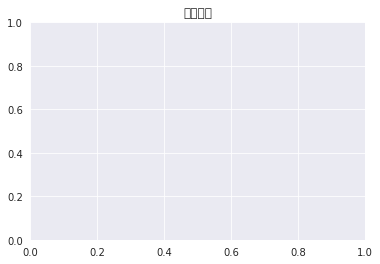

In [135]:
plt.title('한글제목')
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_te

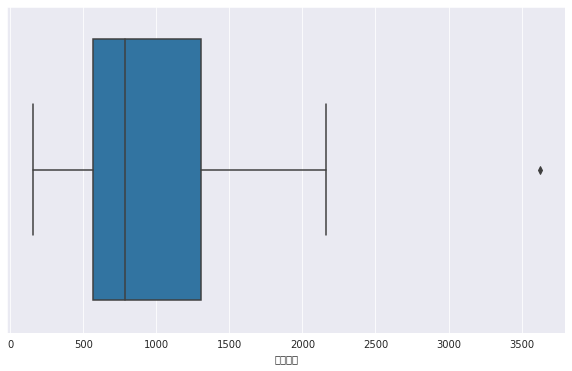

In [119]:
plt.figure(figsize=(10,6))
sns.boxplot(x = seoul_edu_df.학원개수)
plt.show()